# Figure 3: Learning dynamics for optimal discrete time learning rates

This notebook provides the code to produce Figure 2 in the paper: "Learning dynamics of linear denoising autoencoders". (ICML 2018)

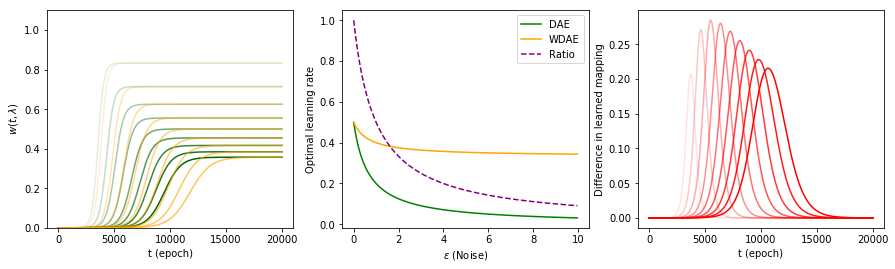

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def scalar_learning_dynamics(lam, var, gamma, N, n_epoch, learning_rate):
    dynamics = []
    tau = 1/learning_rate
    u0 = 0.000001
    g = N*gamma
    xi = lam + N*var
    
    for t in range(n_epoch):
        E = np.exp(2*(lam - g)*t/tau)
        num = (lam-g)*E
        denom = xi*(E - 1) + (lam - g)/u0
        uf = num/denom
        dynamics.append(uf)
    
    return dynamics

noise_dyns = []
reg_dyns = []
var = np.arange(0, 2, 0.2)
alphas = (var-np.min(var))/(np.max(var)-np.min(var))
l = 1
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(15, 4), sharex=False, sharey=False)
ax1.set_ylabel('$w(t, \lambda)$')
ax1.set_ylim(0, 1.1)
ax1.set_xlabel('t (epoch)')
for v, a in zip(var, alphas):
    lr = 0.005*(1/(2*l + 3*v))
    dyns = scalar_learning_dynamics(l, v, 0, 1, 20000, lr) 
    noise_dyns.append(dyns)
    ax1.set_ylim(0, 1.1)     
    ax1.plot(dyns, c='darkgreen', alpha=a, label='Noise')
        

reg = var*l/(var+l)
lrs = 0.005*((l + var)/(2*l*(l + 2*var)))
for r, lr in zip(reg, lrs):
    dyns = scalar_learning_dynamics(l, 0, r, 1, 20000, lr) 
    reg_dyns.append(dyns)
    ax1.plot(dyns, c='orange', alpha=r, label='Weigh decay')

# plot optimal learning rates
var = np.arange(0, 10, 0.02)
ax2.set_ylabel('Optimal learning rate')

# compute optimal learning rates
dae_lr = 1/(2*l+3*var)
eq_gamma = l*var/(l+var)
aewd_lr = 1/(2*l + eq_gamma) 
ratio = (2*l + eq_gamma)/(2*l + 3*var) 
    
# plot learning rates
ax2.plot(var, dae_lr, label='DAE', c='green')
ax2.plot(var, aewd_lr, label='WDAE', c='orange')
ax2.plot(var, ratio, label='Ratio', c='purple', ls='dashed')
ax2.set_xlabel(r'$\varepsilon$ (Noise)')
ax2.legend()

# plot training time differences
for i in range(10):
    diff_dyns = np.array(noise_dyns[i]) - np.array(reg_dyns[i])
    ax3.plot(diff_dyns, alpha=alphas[i], c='red')
ax3.set_xlabel('t (epoch)')
ax3.set_ylabel('Difference in learned mapping')
plt.show()      

**Left**: Dynamics of DAEs (green) vs. WDAEs (orange), where darker line colours correspond to larger amounts noise or weigh decay. 

**Middle**: Optimal learning rate as a function of noise $\varepsilon$ for DAEs, and for WDAEs using an equivalent amount of regularisation $\gamma = \lambda\varepsilon/(\lambda + \varepsilon)$.  

**Right**: Difference in mapping over time.